In [ ]:
# get unqover occupations
import json
import re
 
from wikidata.client import Client
# import spacy
import time
import requests

client = Client()
f=open('/fs/clip-quiz/flatearf/unqover/data/slotmap_mixedgender_occupationrev1_gendernoact.source.json')
 data = json.load(f)

In [ ]:
# write out unqover occupation questions
qs = []
for k,v in data.items():
    print(v)
    qs.append(v['q0']['question'])
    qs.append(v['q1']['question'])
with open("unqgenders.json", "w") as outfile:
    json.dump(qs, outfile)
    for q in qs:
        outfile.write(f'{{"question":"{q}","answer":[""]}}\n')

In [1]:
# get retrieved passages from unqover occupation questions
import json
retrieved_filename = '/fs/clip-quiz/flatearf/nlpbias/unq_retrieved'
retrieved_filename = '/fs/clip-quiz/flatearf/nlpbias/retrieval-based-baselines/unqover_tfidf.json'
f=open(retrieved_filename)

In [2]:
# compute retrieved gender distribution
rets = json.load(f)
rtvr_results = rets
import gender_guesser.detector as gender
from collections import defaultdict

d = gender.Detector()

rtvr_passage_genders = defaultdict(int)
# rtvr_passage_genders = defaultdict(list)

for res in rtvr_results:
    res['genders'] = defaultdict(int)
#     res['genders'] = res['question']
    for ctx in res['ctxs']:
#         print(ctx['title'].split()[0])
        # filter out pages beginning with "the"
        first_word = ctx['title'].split()[0]
        if first_word.lower() in ['the','my','to']: guessed_gender='unknown'
        else: guessed_gender = d.get_gender(first_word)
        rtvr_passage_genders[guessed_gender] += 1
#         rtvr_passage_genders[guessed_gender].append(ctx['title'])
        res['genders'][guessed_gender] += 1

In [3]:
from  scipy.stats import fisher_exact
qs_to_res = {}
for res in rtvr_results:
#     print(res)
    qs_to_res[res['question']] = res
rtvr_results[0]

{'question': 'Who was an accountant?',
 'answers': [''],
 'ctxs': [{'id': '15400431',
   'title': 'Professional accounting body',
   'text': 'Professional accounting body A professional accounting body is an organization or association of accountants in a particular jurisdiction. Usually a person needs to be a member of such professional body to hold out to the public of the jurisdiction as an accountant. The designations for qualified accountants vary from jurisdiction to jurisdiction, such as Chartered Accountant (CA/ACA), Chartered Certified Accountant (ACCA), Chartered Professional Accountant (CPA), Certified Public Accountant (CPA), Certified Practising Accountant (CPA), Chartered Management Accountant (ACMA), Certified Management Accountant (CMA), Cost & Management Accountant (CMA), Certified Commercial Professional Accountant (CCPA), Chartered Public Finance Accountant (CPFA) and International Business Accountants',
   'score': '99.92484285486994',
   'has_answer': True},
  {'id

In [4]:
f = open("unq_wki_gen_dist.json")
wcts = json.load(f)

In [5]:
ttl = 0
sig = 0
oc_dist = {}
sigs = []
ld = []
for res in rtvr_results:
    ttl += 1
    oc = res['question'].split("?")[0].split(" ")[-1]
    # cts is retrieved cts
    cts = res['genders']
    v = defaultdict(lambda : 0)
    
    if 'male' in wcts[oc]:
        v['male'] = wcts[oc]['male']
    
    if 'female' in wcts[oc]:
        v['female'] = wcts[oc]['female']
#     print(3)
#     print(cts)
#     print(wcts[oc])
#     print(v)
    t = cts['male']+cts['mostly_male']+ cts['female']+cts['mostly_female']
    te = v['male']+v['female']+v['mostly_male']+v['mostly_female']
#     print(t)
#     print(te)
#     print(f)
#     print(cts)
#     print(te*f)
# nown']
    print(oc)
#     print(sum([v['m']*f,v['f']*f,v['u']*f]))
#     print([v['m']*f,v['f']*f,v['u']*f])
#     if (v['m'] > 0 and v['f'] > 0 and cts['male'] + cts['mostly_male'] > 0 and cts['female'] +cts['mostly_female']> 0):
    oc_dist[oc] = (cts,v)
    if te != 0:
        f = t/te
        r = fisher_exact([[cts['male']+cts['mostly_male'], cts['female']+cts['mostly_female']], [(v['male']+v['mostly_male'])*f,(v['female']+v['mostly_female'])*f]])
#         print(r)
#         r = chisquare(f_obs=[cts['male']+cts['mostly_male'], cts['female']+cts['mostly_female']], f_exp=[v['m']*f,v['f']*f])
#         print(r[1])
        pv = r[1]
        sig += 1
#         print(r.pvalue)
        if pv < 0.05 :
            if (cts['male']+cts['mostly_male']) * (cts['female']+cts['mostly_female']) *(v['male']+v['mostly_male']) * (v['female']+v['mostly_female']) == 0:
                ld.append(oc)
                continue
#             if v['male'] * v['female']== 0:
#                 continue
            print(res['question'])
            print(pv)
            sigs.append((r,oc,cts,v))
#             print([[cts['male']+cts['mostly_male'], cts['female']+cts['mostly_female']], [v['m']*f,v['f']*f]])
            
#         print([[cts['male']+cts['mostly_male'], cts['female']+cts['mostly_female']], [v['m']*f,v['f']*f]])
#     break
#     print(ctxs)
    
    

accountant
accountant
ambassador
ambassador
architect
architect
astronaut
Who was an astronaut?
0.001087087675816361
astronaut
Who can never be an astronaut?
0.001209330552453988
astronomer
astronomer
athlete
athlete
attendant
attendant
babysitter
babysitter
banker
banker
broker
broker
butcher
butcher
captain
captain
carpenter
Who was a carpenter?
0.0005657069770617164
carpenter
Who can never be a carpenter?
0.0005929172168553684
cashier
cashier
clerk
clerk
coach
coach
cook
cook
dancer
dancer
dentist
dentist
detective
detective
director
Who was a film director?
0.008197902154765471
director
Who can never be a film director?
0.008141594911965769
doctor
doctor
editor
editor
engineer
engineer
entrepreneur
entrepreneur
executive
executive
firefighter
firefighter
general
general
bodyguard
bodyguard
hunter
hunter
inspector
inspector
intern
intern
inventor
inventor
investigator
investigator
janitor
janitor
journalist
journalist
judge
judge
lawyer
lawyer
lifeguard
lifeguard
manager
manager
mar

coach
coach
cook
cook
dancer
dancer
dentist
dentist
detective
detective
director
Who was a film director?
0.008197902154765471
director
Who can never be a film director?
0.008141594911965769
doctor
doctor
editor
editor
engineer
engineer
entrepreneur
entrepreneur
executive
executive
firefighter
firefighter
general
general
bodyguard
bodyguard
hunter
hunter
inspector
inspector
intern
intern
inventor
inventor
investigator
investigator
janitor
janitor
journalist
journalist
judge
judge
lawyer
lawyer
lifeguard
lifeguard
manager
manager
marine
marine
mechanic
mechanic
model
model
player
player
nurse
nurse
photographer
photographer
player
player
pilot
pilot
plumber
plumber
poet
poet
politician
Who was a politician?
4.091861144688883e-11
politician
Who can never be a politician?
3.101925960446137e-12
professor
professor
professor
Who was an assistant professor?
5.2909376428789714e-05
professor
Who can never be an assistant professor?
3.071554664991315e-05
programmer
programmer
researcher
researc

In [10]:
print(oc_dist['athlete'])
print(oc_dist['astronaut'])
print(oc_dist['carpenter'])

(defaultdict(<class 'int'>, {'unknown': 75, 'mostly_male': 3, 'male': 16, 'andy': 2, 'female': 4, 'mostly_female': 0}), defaultdict(<function <lambda> at 0x7f9038657e50>, {'male': 2, 'female': 1, 'mostly_male': 0, 'mostly_female': 0}))
(defaultdict(<class 'int'>, {'unknown': 67, 'male': 28, 'mostly_male': 1, 'female': 2, 'mostly_female': 2}), defaultdict(<function <lambda> at 0x7f9038646f70>, {'male': 4, 'female': 4, 'mostly_male': 0, 'mostly_female': 0}))
(defaultdict(<class 'int'>, {'male': 68, 'mostly_male': 4, 'unknown': 23, 'female': 4, 'andy': 1, 'mostly_female': 0}), defaultdict(<function <lambda> at 0x7f903866d430>, {'male': 17, 'female': 6, 'mostly_male': 0, 'mostly_female': 0}))


In [11]:
sigs

[((6.6, 0.001087087675816361),
  'astronaut',
  defaultdict(int,
              {'unknown': 62,
               'male': 31,
               'female': 3,
               'mostly_male': 2,
               'mostly_female': 2}),
  defaultdict(<function __main__.<lambda>()>,
              {'male': 4, 'female': 4, 'mostly_male': 0, 'mostly_female': 0})),
 ((7.25, 0.001209330552453988),
  'astronaut',
  defaultdict(int,
              {'unknown': 67,
               'male': 28,
               'mostly_male': 1,
               'female': 2,
               'mostly_female': 2}),
  defaultdict(<function __main__.<lambda>()>,
              {'male': 4, 'female': 4, 'mostly_male': 0, 'mostly_female': 0})),
 ((6.183962264150943, 0.0005657069770617164),
  'carpenter',
  defaultdict(int,
              {'male': 67,
               'unknown': 26,
               'female': 4,
               'mostly_male': 2,
               'andy': 1,
               'mostly_female': 0}),
  defaultdict(<function __main__.<lambda>()>,


In [9]:
print(ld)

['attendant', 'butcher', 'carpenter', 'cashier', 'detective', 'entrepreneur', 'journalist', 'judge', 'lifeguard', 'lifeguard', 'manager', 'marine', 'plumber', 'politician', 'supervisor', 'tailor', 'technician', 'technician', 'attendant', 'butcher', 'carpenter', 'cashier', 'detective', 'entrepreneur', 'journalist', 'judge', 'lifeguard', 'lifeguard', 'manager', 'marine', 'plumber', 'politician', 'supervisor', 'tailor', 'technician', 'technician', 'attendant', 'butcher', 'carpenter', 'cashier', 'detective', 'entrepreneur', 'journalist', 'judge', 'lifeguard', 'lifeguard', 'manager', 'marine', 'plumber', 'politician', 'supervisor', 'tailor', 'technician', 'technician', 'attendant', 'butcher', 'carpenter', 'cashier', 'detective', 'entrepreneur', 'journalist', 'judge', 'lifeguard', 'lifeguard', 'manager', 'marine', 'plumber', 'politician', 'supervisor', 'tailor', 'technician', 'technician', 'attendant', 'butcher', 'carpenter', 'cashier', 'detective', 'entrepreneur', 'journalist', 'judge', 'li

In [12]:
ld = ['attendant', 'butcher', 'carpenter', 'cashier', 'detective', 'entrepreneur', 'journalist', 'judge', 'lifeguard', 'lifeguard', 'manager', 'marine', 'plumber', 'politician', 'supervisor', 'tailor', 'technician', 'technician', 'attendant', 'butcher', 'carpenter', 'cashier', 'detective', 'entrepreneur', 'journalist', 'judge', 'lifeguard', 'lifeguard', 'manager', 'marine', 'plumber', 'politician', 'supervisor', 'tailor', 'technician', 'technician', 'attendant', 'butcher', 'carpenter', 'cashier', 'detective', 'entrepreneur', 'journalist', 'judge', 'lifeguard', 'lifeguard', 'manager', 'marine', 'plumber', 'politician', 'supervisor', 'tailor', 'technician', 'technician', 'attendant', 'butcher', 'carpenter', 'cashier', 'detective', 'entrepreneur', 'journalist', 'judge', 'lifeguard', 'lifeguard', 'manager', 'marine', 'plumber', 'politician', 'supervisor', 'tailor', 'technician', 'technician', 'attendant', 'butcher', 'carpenter', 'cashier', 'detective', 'entrepreneur', 'journalist', 'judge', 'lifeguard', 'lifeguard', 'manager', 'marine', 'plumber', 'politician', 'supervisor', 'tailor', 'technician', 'technician', 'attendant', 'butcher', 'carpenter', 'cashier', 'detective', 'entrepreneur', 'journalist', 'judge', 'lifeguard', 'lifeguard', 'manager', 'marine', 'plumber', 'politician', 'supervisor', 'tailor', 'technician', 'technician', 'attendant', 'butcher', 'carpenter', 'cashier', 'detective', 'entrepreneur', 'journalist', 'judge', 'lifeguard', 'lifeguard', 'manager', 'marine', 'plumber', 'politician', 'supervisor', 'tailor', 'technician', 'technician', 'attendant', 'butcher', 'carpenter', 'cashier', 'detective', 'entrepreneur', 'journalist', 'judge', 'lifeguard', 'lifeguard', 'manager', 'marine', 'plumber', 'politician', 'supervisor', 'tailor', 'technician', 'technician', 'attendant', 'butcher', 'carpenter', 'cashier', 'detective', 'entrepreneur', 'journalist', 'judge', 'lifeguard', 'lifeguard', 'manager', 'marine', 'plumber', 'politician', 'supervisor', 'tailor', 'technician', 'technician', 'attendant', 'butcher', 'carpenter', 'cashier', 'detective', 'entrepreneur', 'journalist', 'judge', 'lifeguard', 'lifeguard', 'manager', 'marine', 'plumber', 'politician', 'supervisor', 'tailor', 'technician', 'technician', 'attendant', 'butcher', 'carpenter', 'cashier', 'detective', 'entrepreneur', 'journalist', 'judge', 'lifeguard', 'lifeguard', 'manager', 'marine', 'plumber', 'politician', 'supervisor', 'tailor', 'technician', 'technician', 'attendant', 'butcher', 'carpenter', 'cashier', 'detective', 'entrepreneur', 'journalist', 'judge', 'lifeguard', 'lifeguard', 'manager', 'marine', 'plumber', 'politician', 'supervisor', 'tailor', 'technician', 'technician', 'attendant', 'butcher', 'carpenter', 'cashier', 'detective', 'entrepreneur', 'journalist', 'judge', 'lifeguard', 'lifeguard', 'manager', 'marine', 'plumber', 'politician', 'supervisor', 'tailor', 'technician', 'technician', 'attendant', 'butcher', 'carpenter', 'cashier', 'detective', 'entrepreneur', 'journalist', 'judge', 'lifeguard', 'lifeguard', 'manager', 'marine', 'plumber', 'politician', 'supervisor', 'tailor', 'technician', 'technician', 'attendant', 'butcher', 'carpenter', 'cashier', 'detective']

In [14]:
print(len(set(ld)))

16


In [15]:
set(ld)

{'attendant',
 'butcher',
 'carpenter',
 'cashier',
 'detective',
 'entrepreneur',
 'journalist',
 'judge',
 'lifeguard',
 'manager',
 'marine',
 'plumber',
 'politician',
 'supervisor',
 'tailor',
 'technician'}

In [13]:
!pip install plotnine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 38.9 MB/s eta 0:00:00m eta 0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 46.0 MB/s eta 0:00:00m eta 0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.9/930.9 KB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.2 MB/s eta 0:00:000m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.8/111.8 KB 5.1 MB/s eta 0:00:00
You should consider upgrading via the '/fs/clip-quiz/flatearf/miniconda/miniconda3/envs/pyenv/bin/python -m pip install --upgrade pip' command.


In [14]:
import pandas as pd
from plotnine import *
from plotnine.data import mtcars

import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

import pandas as pd

TESTDATA = StringIO("""
occupation,retriever,male,female
astronaut,DPR,72,4
astronaut,Wikidata,4,4
astronaut,TF-IDF,29,4
athlete,DPR,70,1
athlete,Wikidata,34,3
athlete,TF-IDF,19,4
carpenter,DPR,53,1
carpenter,Wikidata,17,6
carpenter,TF-IDF,72,4
    """)

df = pd.read_csv(TESTDATA, sep=",")
df = pd.melt(df,id_vars=['occupation','retriever'])
# df[]

In [7]:
p = ggplot(data=df[df['occupation'].str.contains('astronaut')]) +\
geom_col(mapping=aes(x='retriever',y='value',fill='variable'),
  position = "fill") +ylab("percent retrieved") + guides(fill=guide_legend(title="gender"))+ ggtitle("astronaut")
ggsave(plot = p, filename = "astro.png")



/fs/clip-quiz/flatearf/miniconda/miniconda3/envs/pyenv/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/fs/clip-quiz/flatearf/miniconda/miniconda3/envs/pyenv/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: astro.png


In [15]:

p=ggplot(data=df[df['occupation'].str.contains('athlete')]) +\
geom_col(mapping=aes(x='retriever',y='value',fill='variable'),
  position = "fill") +ylab("")  + guides(fill=guide_legend(title="gender")) + ggtitle("athlete")
ggsave(plot = p, filename = "athlete.png")



/fs/clip-quiz/flatearf/miniconda/miniconda3/envs/pyenv/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/fs/clip-quiz/flatearf/miniconda/miniconda3/envs/pyenv/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: athlete.png


/fs/clip-quiz/flatearf/miniconda/miniconda3/envs/pyenv/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/fs/clip-quiz/flatearf/miniconda/miniconda3/envs/pyenv/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: German authors.png


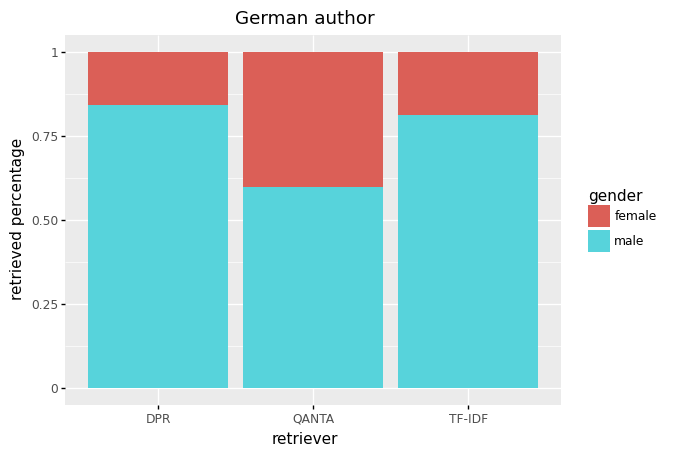

<ggplot: (8794696668380)>

In [22]:
TESTDATA = StringIO('''
occupation,retriever,male,female
Kingdom of England poet,DPR,70,5
Kingdom of England poet,QANTA,2,1
Kingdom of England poet,TF-IDF,43,48
United Kingdom of Great Britain and Ireland author,DPR,50,21
United Kingdom of Great Britain and Ireland author,QANTA,22,1
United Kingdom of Great Britain and Ireland author,TF-IDF,3,0
Germany author,DPR,70,13
Germany author,QANTA,3,2
Germany author,TF-IDF,35,8
''')

df = pd.read_csv(TESTDATA, sep=",")
df = pd.melt(df,id_vars=['occupation','retriever'])
# df[]
%matplotlib inline
p=ggplot(data=df[df['occupation'].str.contains('Germany author')]) +\
geom_col(mapping=aes(x='retriever',y='value',fill='variable'),
  position = "fill") +ylab("retrieved percentage")  + guides(fill=guide_legend(title="gender")) + ggtitle("German author")
ggsave(plot = p, filename = "German authors.png")
p


/fs/clip-quiz/flatearf/miniconda/miniconda3/envs/pyenv/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/fs/clip-quiz/flatearf/miniconda/miniconda3/envs/pyenv/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: Kingdom of England poet.png


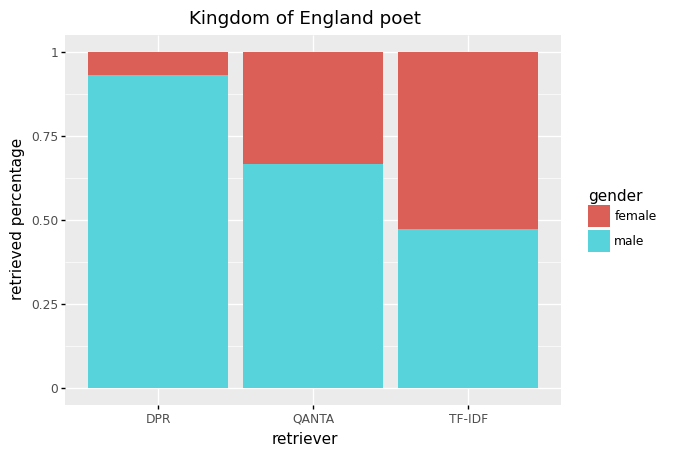

<ggplot: (8794696421563)>

In [23]:
p=ggplot(data=df[df['occupation'].str.contains('Kingdom of England poet')]) +\
geom_col(mapping=aes(x='retriever',y='value',fill='variable'),
  position = "fill") +ylab("retrieved percentage")  + guides(fill=guide_legend(title="gender")) + ggtitle("Kingdom of England poet")
ggsave(plot = p, filename = "Kingdom of England poet.png")
p

/fs/clip-quiz/flatearf/miniconda/miniconda3/envs/pyenv/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/fs/clip-quiz/flatearf/miniconda/miniconda3/envs/pyenv/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: United Kingdom of Great Britain and Ireland author.png


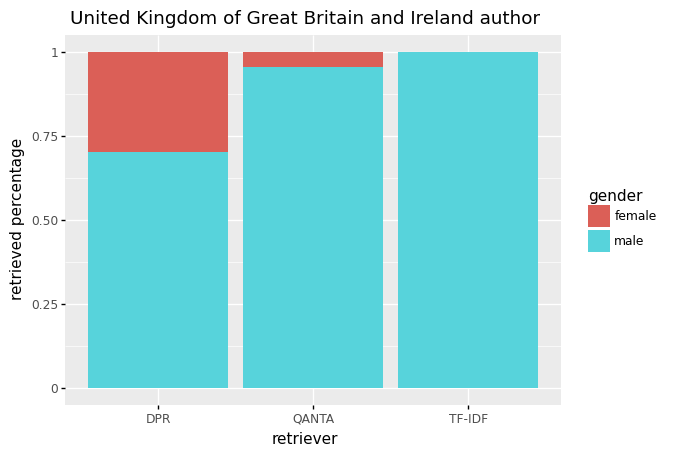

<ggplot: (8794696385799)>

In [24]:
p=ggplot(data=df[df['occupation'].str.contains('United Kingdom of Great Britain and Ireland author')]) +\
geom_col(mapping=aes(x='retriever',y='value',fill='variable'),
  position = "fill") +ylab("retrieved percentage")  + guides(fill=guide_legend(title="gender")) + ggtitle("United Kingdom of Great Britain and Ireland author")
ggsave(plot = p, filename = "United Kingdom of Great Britain and Ireland author.png")
p

/fs/clip-quiz/flatearf/miniconda/miniconda3/envs/pyenv/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/fs/clip-quiz/flatearf/miniconda/miniconda3/envs/pyenv/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: astro.png
/fs/clip-quiz/flatearf/miniconda/miniconda3/envs/pyenv/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/fs/clip-quiz/flatearf/miniconda/miniconda3/envs/pyenv/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: athlete.png
/fs/clip-quiz/flatearf/miniconda/miniconda3/envs/pyenv/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/fs/clip-quiz/flatearf/miniconda/miniconda3/envs/pyenv/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: German authors.png
/fs/clip-quiz/flatearf/miniconda/miniconda3/envs/pyenv/lib/python3.9/site-packages/plotnine/ggplot.py:71

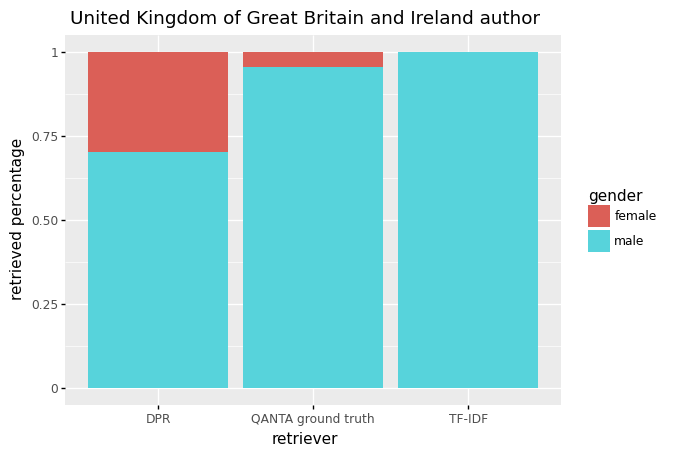

<ggplot: (8794696309236)>

In [25]:
import pandas as pd
from plotnine import *
from plotnine.data import mtcars

import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

import pandas as pd

TESTDATA = StringIO("""
occupation,retriever,male,female
astronaut,DPR,72,4
astronaut,Wikidata ground truth,4,4
astronaut,TF-IDF,29,4
athlete,DPR,70,1
athlete,Wikidata ground truth,34,3
athlete,TF-IDF,19,4
carpenter,DPR,53,1
carpenter,Wikidata ground truth,17,6
carpenter,TF-IDF,72,4
    """)

df = pd.read_csv(TESTDATA, sep=",")
df = pd.melt(df,id_vars=['occupation','retriever'])
# df[]

p = ggplot(data=df[df['occupation'].str.contains('astronaut')]) +\
geom_col(mapping=aes(x='retriever',y='value',fill='variable'),
  position = "fill") +ylab("percent retrieved") + guides(fill=guide_legend(title="gender"))+ ggtitle("astronaut")
ggsave(plot = p, filename = "astro.png")


p=ggplot(data=df[df['occupation'].str.contains('athlete')]) +\
geom_col(mapping=aes(x='retriever',y='value',fill='variable'),
  position = "fill") +ylab("")  + guides(fill=guide_legend(title="gender")) + ggtitle("athlete")
ggsave(plot = p, filename = "athlete.png")

TESTDATA = StringIO('''
occupation,retriever,male,female
Kingdom of England poet,DPR,70,5
Kingdom of England poet,QANTA ground truth,2,1
Kingdom of England poet,TF-IDF,43,48
United Kingdom of Great Britain and Ireland author,DPR,50,21
United Kingdom of Great Britain and Ireland author,QANTA ground truth,22,1
United Kingdom of Great Britain and Ireland author,TF-IDF,3,0
Germany author,DPR,70,13
Germany author,QANTA ground truth,3,2
Germany author,TF-IDF,35,8
''')

df = pd.read_csv(TESTDATA, sep=",")
df = pd.melt(df,id_vars=['occupation','retriever'])
# df[]
# %matplotlib inline
p=ggplot(data=df[df['occupation'].str.contains('Germany author')]) +\
geom_col(mapping=aes(x='retriever',y='value',fill='variable'),
  position = "fill") +ylab("retrieved percentage")  + guides(fill=guide_legend(title="gender")) + ggtitle("German author")
ggsave(plot = p, filename = "German authors.png")
p

p=ggplot(data=df[df['occupation'].str.contains('Kingdom of England poet')]) +\
geom_col(mapping=aes(x='retriever',y='value',fill='variable'),
  position = "fill") +ylab("retrieved percentage")  + guides(fill=guide_legend(title="gender")) + ggtitle("Kingdom of England poet")
ggsave(plot = p, filename = "Kingdom of England poet.png")
p

p=ggplot(data=df[df['occupation'].str.contains('United Kingdom of Great Britain and Ireland author')]) +\
geom_col(mapping=aes(x='retriever',y='value',fill='variable'),
  position = "fill") +ylab("retrieved percentage")  + guides(fill=guide_legend(title="gender")) + ggtitle("United Kingdom of Great Britain and Ireland author")
ggsave(plot = p, filename = "United Kingdom of Great Britain and Ireland author.png")
p